<a href="https://colab.research.google.com/github/xehau/xehau_lessons/blob/master/eager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Eager Execution の基本

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/eager"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/guide/eager.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/guide/eager.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/guide/eager.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: これらのドキュメントは私たちTensorFlowコミュニティが翻訳したものです。コミュニティによる 翻訳は**ベストエフォート**であるため、この翻訳が正確であることや[英語の公式ドキュメント](https://www.tensorflow.org/?hl=en)の 最新の状態を反映したものであることを保証することはできません。 この翻訳の品質を向上させるためのご意見をお持ちの方は、GitHubリポジトリ[tensorflow/docs](https://github.com/tensorflow/docs)にプルリクエストをお送りください。 コミュニティによる翻訳やレビューに参加していただける方は、 [docs-ja@tensorflow.org メーリングリスト](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ja)にご連絡ください。

TensorFlow の Eager Execution は、計算グラフの作成と評価を同時におこなう命令的なプログラミングを行うための環境です：
オペレーションはあとで実行するための計算グラフでなく、具体的な計算結果の値を返します。
この方法を用いることにより、初心者にとって TensorFlow を始めやすくなり、またモデルのデバッグも行いやすくなります。
さらにコードの記述量も削減されます。
このガイドの内容を実行するためには、対話的インタープリタ `python` を起動し、以下のコードサンプルを実行してください。

Eager Execution は研究や実験のための柔軟な機械学習環境として、以下を提供します。

* *直感的なインタフェース*— Python のデータ構造を使用して、コードを自然に記述することができます。小規模なモデルとデータに対してすばやく実験を繰り返すことができます。
* *より簡単なデバッグ*— ops を直接呼び出すことで、実行中のモデルを調査したり、変更をテストすることができます。 Python 標準のデバッグツールを用いて即座にエラーのレポーティングができます。
* *自然な制御フロー*— TensorFlow のグラフ制御フローの代わりに Python の制御フローを利用するため、動的なモデルの作成をシンプルに行うことができます。
  
Eager Execution は TensorFlow のほとんどのオペレーションとGPUアクセラレーションをサポートします。

Note: いくつかのモデルは Eager Execution を有効化することでオーバヘッドが増える可能性があります。
パフォーマンス改善を行っていますが、もしも問題を発見したら、バグ報告してベンチマークを共有してください。

## セットアップと基本的な使い方

In [ ]:
import tensorflow as tf

import cProfile

TensorFlow 2.0 では、 Eager Execution はデフォルトで有効化されます。

In [ ]:
tf.executing_eagerly()

True

これで TensorFlow のオペレーションを実行してみましょう。結果はすぐに返されます。

In [ ]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, [[4.]]


Eager Execution を有効化することで、 TensorFlow の挙動は変わります—TensorFlowは即座に式を評価して結果をPythonに返すようになります。
`tf.Tensor` オブジェクトは計算グラフのノードへのシンボリックハンドルの代わりに具体的な値を参照します。
セッションの中で構築して実行する計算グラフが存在しないため、`print（）`やデバッガを使って容易に結果を調べることができます。
勾配計算を遮ることなくテンソル値を評価、出力、およびチェックすることができます。

Eager Execution は、[NumPy](http://www.numpy.org/)と一緒に使うことができます。
NumPy のオペレーションは、`tf.Tensor`を引数として受け取ることができます。
TensorFlow [math operations](https://www.tensorflow.org/api_guides/python/math_ops) はPython オブジェクトと Numpy array を `tf.Tensor` に変換します。
`tf.Tensor.numpy` メソッドはオブジェクトの値を NumPy の `ndarray` 形式で返します。

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
# ブロードキャストのサポート
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
# オペレータのオーバーロードがサポートされている
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [ ]:
# NumPy valueの使用
import numpy as np

c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


In [ ]:
# Tensor から numpy の値を得る
print(a.numpy())
# => [[1 2]
#     [3 4]]

[[1 2]
 [3 4]]


## 動的な制御フロー

Eager Execution の主要なメリットは、モデルを実行する際にホスト言語のすべての機能性が利用できることです。
たとえば、[fizzbuzz](https://en.wikipedia.org/wiki/Fizz_buzz)が簡単に書けます：

In [ ]:
def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)
  for num in range(1, max_num.numpy()+1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int(num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

In [ ]:
fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


この関数はテンソル値に依存する条件式を持ち、実行時にこれらの値を表示します。

## Eager Execution による学習

### 勾配の計算

[自動微分](https://en.wikipedia.org/wiki/Automatic_differentiation)はニューラルネットワークの学習で利用される[バックプロパゲーション](https://en.wikipedia.org/wiki/Backpropagation)などの機械学習アルゴリズムの実装を行う上で便利です。
Eager Executionでは、勾配計算をあとで行うためのオペレーションをトレースするために`tf.GradientTape` を利用します。

Eager Execution では、学習や勾配計算に, `tf.GradientTape` を利用できます。これは複雑な学習ループを実行するときに特に役立ちます。

各呼び出し中に異なるオペレーションが発生する可能性があるため、すべての forward-pass オペレーションは一つの「テープ」に記録されます。勾配を計算するには、テープを逆方向に再生してから破棄します。特定の `tf.GradientTape`は一つのグラデーションしか計算できません。後続の呼び出しは実行時エラーをスローします。

In [ ]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = w * w

grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


### モデル学習

以下の example は MNIST という手書き数字分類を行うマルチレイヤーモデルを作成します。
Eager Execution 環境における学習可能なグラフを構築するためのオプティマイザーとレイヤーAPIを提示します。

In [ ]:
# mnist データのを取得し、フォーマットする
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# モデルを構築する
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

学習を行わずとも、モデルを呼び出して、 Eager Execution により、出力を検査することができます：

In [ ]:
for images,labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.08478333  0.03245945  0.03036788  0.00822979 -0.01854458 -0.04390082
  -0.04571518 -0.03834378  0.03985712  0.07356731]]


keras モデルは組み込みで学習のループを回すメソッド `fit` がありますが、よりカスタマイズが必要な場合もあるでしょう。 Eager Executionを用いて実装された学習ループのサンプルを以下に示します：

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

Note: モデルの状況を確認したいときは、 `tf.debugging` にある assert 機能を利用してください。この機能は Eager Execution と Graph Execution のどちらでも利用できます。

In [ ]:
def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)
    
    # assertを入れて出力の型をチェックする。
    tf.debugging.assert_equal(logits.shape, (32, 10))
    
    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [ ]:
def train():
  for epoch in range(3):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print ('Epoch {} finished'.format(epoch))

In [ ]:
train()

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [entropy]')

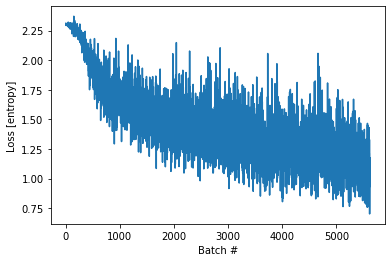

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

### Variablesとオプティマイザ

`tf.Variable` オブジェクトは、学習中にアクセスされるミュータブルな `tf.Tensor` 値を格納し、自動微分を容易にします。
モデルのパラメータは、変数としてクラスにカプセル化できます。

`tf.GradientTape` と共に `tf.Variable` を使うことでモデルパラメータはよりカプセル化されます。たとえば、上の
の自動微分の例は以下のように書き換えることができます：

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')
  def call(self, inputs):
    return inputs * self.W + self.B

# 3 ＊ x + 2を近似するトイデータセット
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# 最適化対象のloss関数
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])

# 定義：
# 1. モデル
# 2. モデルパラメータに関する損失関数の導関数
# 3. 導関数に基づいて変数を更新するストラテジ。
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# 学習ループ
for i in range(300):
  grads = grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

Initial loss: 68.874
Loss at step 000: 66.192
Loss at step 020: 30.104
Loss at step 040: 13.996
Loss at step 060: 6.807
Loss at step 080: 3.597
Loss at step 100: 2.165
Loss at step 120: 1.525
Loss at step 140: 1.240
Loss at step 160: 1.113
Loss at step 180: 1.056
Loss at step 200: 1.030
Loss at step 220: 1.019
Loss at step 240: 1.014
Loss at step 260: 1.012
Loss at step 280: 1.011
Final loss: 1.010
W = 2.989409923553467, B = 2.023470163345337


## Eager Execution の途中でオブジェクトのステータスを使用する

TF 1.x の Graph Execution では、プログラムの状態（Variableなど）は global collection に格納され、それらの存続期間は `tf.Session` オブジェクトによって管理されます。
対照的に、 Eager Execution の間、状態オブジェクトの存続期間は、対応する Python オブジェクトの存続期間によって決定されます。

### 変数とオブジェクト

Eager Execution の間、変数はオブジェクトへの最後の参照が削除され、その後削除されるまで存続します。

In [ ]:
if tf.test.is_gpu_available():
  with tf.device("gpu:0"):
    v = tf.Variable(tf.random.normal([1000, 1000]))
    v = None  # v は GPU メモリを利用しなくなる

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


### オブジェクトベースの保存

このセクションは、[チェックポイントの学習の手引き]（./checkpoint.ipynb） の省略版です。

`tf.train.Checkpoint` はチェックポイントを用いて `tf.Variable` を保存および復元することができます：

In [ ]:
x = tf.Variable(10.)
checkpoint = tf.train.Checkpoint(x=x)

In [ ]:
x.assign(2.)   # 新しい値を変数に代入して保存する。
checkpoint_path = './ckpt/'
checkpoint.save('./ckpt/')

'./ckpt/-1'

In [ ]:
x.assign(11.)  # 保存後に変数の値を変える。

# チェックポイントから変数を復元する
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))

print(x)  # => 2.0

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


モデルを保存して読み込むために、 `tf.train.Checkpoint` は隠れ変数なしにオブジェクトの内部状態を保存します。 `モデル`、 `オプティマイザ` 、そしてグローバルステップの状態を記録するには、それらを `tf.train.Checkpoint` に渡します。

In [ ]:
import os

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
checkpoint_dir = 'path/to/model_dir'
if not os.path.exists(checkpoint_dir):
  os.makedirs(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
root = tf.train.Checkpoint(optimizer=optimizer,
                           model=model)

root.save(checkpoint_prefix)
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

多くの学習ループでは、変数は `tf.train..Checkpoint.restore` が呼ばれたあとに作成されます。これらの変数は作成されてすぐに復元され、チェックポイントがすべてロードされたことを確認するためのアサーションが利用可能になります。詳しくは、 [guide to training checkpoints](./checkpoint.ipynb) を見てください。

### オブジェクト指向メトリクス

`tfe.keras.metrics`はオブジェクトとして保存されます。新しいデータを呼び出し可能オブジェクトに渡してメトリクスを更新し、 `tfe.keras.metrics.result`メソッドを使って結果を取得します。次に例を示します:

In [ ]:
m = tf.keras.metrics.Mean("loss")
m(0)
m(5)
m.result()  # => 2.5
m([8, 9])
m.result()  # => 5.5

<tf.Tensor: shape=(), dtype=float32, numpy=5.5>

## 高度な自動微分トピック

### 動的なモデル

`tf.GradientTape` は動的モデルでも使うことができます。 
以下の [バックトラックライン検索](https://wikipedia.org/wiki/Backtracking_line_search)
アルゴリズムの例は、複雑な制御フローにもかかわらず
勾配があり、微分可能であることを除いて、通常の NumPy コードのように見えます：

In [ ]:
def line_search_step(fn, init_x, rate=1.0):
  with tf.GradientTape() as tape:
    # 変数は自動的に記録されるが、Tensorは手動でウォッチする
    tape.watch(init_x)
    value = fn(init_x)
  grad = tape.gradient(value, init_x)
  grad_norm = tf.reduce_sum(grad * grad)
  init_value = value
  while value > init_value - rate * grad_norm:
    x = init_x - rate * grad
    value = fn(x)
    rate /= 2.0
  return x, value

### カスタム勾配

カスタム勾配は、勾配を上書きする簡単な方法です。 フォワード関数では、
入力、出力、または中間結果に関する勾配を定義します。たとえば、逆方向パスにおいて勾配のノルムを制限する簡単な方法は次のとおりです：

In [ ]:
@tf.custom_gradient
def clip_gradient_by_norm(x, norm):
  y = tf.identity(x)
  def grad_fn(dresult):
    return [tf.clip_by_norm(dresult, norm), None]
  return y, grad_fn

カスタム勾配は、一連の演算に対して数値的に安定した勾配を提供するために共通的に使用されます。:

In [ ]:
def log1pexp(x):
  return tf.math.log(1 + tf.exp(x))

def grad_log1pexp(x):
  with tf.GradientTape() as tape:
    tape.watch(x)
    value = log1pexp(x)
  return tape.gradient(value, x)

In [ ]:
# 勾配計算は x = 0 のときはうまくいく。
grad_log1pexp(tf.constant(0.)).numpy()

0.5

In [ ]:
# しかし、x = 100のときは数値的不安定により失敗する。
grad_log1pexp(tf.constant(100.)).numpy()

nan

ここで、 `log1pexp` 関数はカスタム勾配を用いて解析的に単純化することができます。
以下の実装は、フォワードパスの間に計算された `tf.exp（x）` の値を
再利用します—冗長な計算を排除することでより効率的になります：

In [ ]:
@tf.custom_gradient
def log1pexp(x):
  e = tf.exp(x)
  def grad(dy):
    return dy * (1 - 1 / (1 + e))
  return tf.math.log(1 + e), grad

def grad_log1pexp(x):
  with tf.GradientTape() as tape:
    tape.watch(x)
    value = log1pexp(x)
  return tape.gradient(value, x)

In [ ]:
# 上と同様に、勾配計算はx = 0のときにはうまくいきます。
grad_log1pexp(tf.constant(0.)).numpy()

0.5

In [ ]:
# また、勾配計算はx = 100でも機能します。
grad_log1pexp(tf.constant(100.)).numpy()

1.0

## パフォーマンス

Eager Executionの間、計算は自動的にGPUにオフロードされます。計算を実行するデバイスを指定したい場合は、
`tf.device（ '/ gpu：0'）` ブロック（もしくはCPUを指定するブロック）で囲むことで指定できます：

In [ ]:
import time

def measure(x, steps):
  # TensorFlowはGPUを初めて使用するときに初期化するため、時間計測対象からは除外する。
  tf.matmul(x, x)
  start = time.time()
  for i in range(steps):
    x = tf.matmul(x, x)
  # ｔｆ．ｍａｔｍｕｌは、行列乗算が完了する前に戻ることができる。
  # （たとえば、ＣＵＤＡストリームにオペレーションをエンキューした後に戻すことができる）。
  # 以下のx.numpy（）呼び出しは、すべてのキューに入れられたオペレーションが完了したことを確認する。
  # （そして結果をホストメモリにコピーするため、計算時間は単純なmatmulオペレーションよりも多くのことを含む時間になる。）
  _ = x.numpy()
  end = time.time()
  return end - start

shape = (1000, 1000)
steps = 200
print("Time to multiply a {} matrix by itself {} times:".format(shape, steps))

# CPU上で実行するとき：
with tf.device("/cpu:0"):
  print("CPU: {} secs".format(measure(tf.random.normal(shape), steps)))

# GPU上で実行するとき（GPUが利用できれば）：
if tf.test.is_gpu_available():
  with tf.device("/gpu:0"):
    print("GPU: {} secs".format(measure(tf.random.normal(shape), steps)))
else:
  print("GPU: not found")

Time to multiply a (1000, 1000) matrix by itself 200 times:
CPU: 6.238846063613892 secs
GPU: not found


`tf.Tensor` オブジェクトはそのオブジェクトに対するオペレーションを実行するために別のデバイスにコピーすることができます：

In [ ]:
if tf.test.is_gpu_available():
  x = tf.random.normal([10, 10])

  x_gpu0 = x.gpu()
  x_cpu = x.cpu()

  _ = tf.matmul(x_cpu, x_cpu)    # CPU上で実行するとき
  _ = tf.matmul(x_gpu0, x_gpu0)  # GPU:0上で実行するとき

### ベンチマーク

GPUでの
[ResNet50](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/eager/python/examples/resnet50)
の学習のような、計算量の多いモデルの場合は、Eager Executionのパフォーマンスは `tf.function` のパフォーマンスに匹敵します。
しかし、この2つの環境下のパフォーマンスの違いは計算量の少ないモデルではより大きくなり、小さなたくさんのオペレーションからなるモデルでホットコードパスを最適化するためにやるべきことがあります。

## functionsの利用

Eager Execution は開発とデバッグをより対話的にしますが、
TensorFlow 1.x スタイルの Graph Execution は分散学習、パフォーマンスの最適化、そしてプロダクション環境へのデプロイの観点で利点があります。

2つの手法のギャップを埋めるために、 TensorFlow 2.0 は `ｔｆ．function` という機能を導入しています。
詳しくは、 [Autograph](./function.ipynb) のガイドを見てください。
